# Preparation

### Arranging Working Directory

In [2]:
import os
# Show previuos working directory
print("Previuos working dir: " + os.getcwd())
# Change working directory as main project directory
os.chdir("..")
# Show current working directory
print("Current working dir: " + os.getcwd())

Previuos working dir: C:\Users\nsehb\Documents\face-detection-pack\face-detection-app-tutorial\tutorial
Current working dir: C:\Users\nsehb\Documents\face-detection-pack\face-detection-app-tutorial


### Importing Required Packages

In [9]:
import cv2 # OpenCV for image editing, computer vision and deep learning
import numpy as np # Numpy for math/array operations
from matplotlib import pyplot as plt # Matplotlib for visualization
from source.utils import get_folder_dir # Custom function for better directory name handling
from source.utils import plot_image # Custom function for plotting images in jupyter
from source.utils import draw_rectangles # Custom function for drawing detection rectangles
plt.rcParams["figure.figsize"] = (14, 12) # (w, h) # Figure size arrangement

# Face Detection with Haar Cascade

### Define images directory

In [4]:
# Get images directory
images_dir = get_folder_dir("images") 

# Print images directory
print("Images directory: " + images_dir)

Images directory: C:\Users\nsehb\Documents\face-detection-pack\face-detection-app-tutorial/images/


### Read and visualize sample image

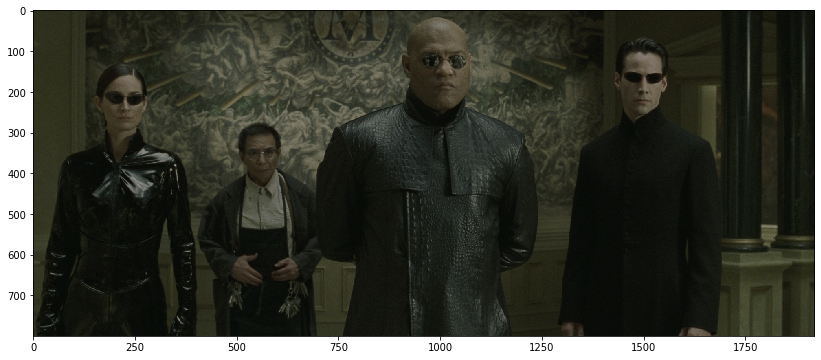

In [6]:
# Read image
image = cv2.imread(images_dir + "sample1.jpg")

# Show image
plot_image(image)

### Greyscale conversion

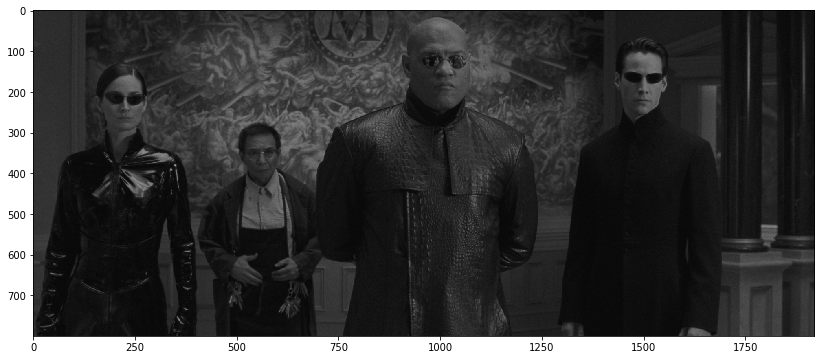

In [7]:
# Convert the test image to gray scale (opencv face detector expects gray images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plot_image(gray)

### Load Haar Cascade model and perform detection

In [8]:
# Load OpenCV Haar Cascade frontal face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect multiscale images (some images may be closer to camera than others)
# result is a list of faces
detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);

# Print number of detected faces
print("I see " + str(len(detected_faces)) + " faces..")

I see 4 faces..


### Process detection result

In [15]:
# Get face detection details with index 0 (first face)
face_index = 2

# Initialize a dictionary that will contain detection details
face_dict = {}

# Add detection coords to dictionary
face_dict['rect'] = detected_faces[face_index]

# Crop detection region from image and add it to dictionary
(start_x, start_y, width, height) = face_dict['rect']
start_x = start_x
start_y = start_y
end_x = start_x + width
end_y = start_y + height
face_dict['face'] = image[start_y : end_y, start_x : end_x]

### Show detected region

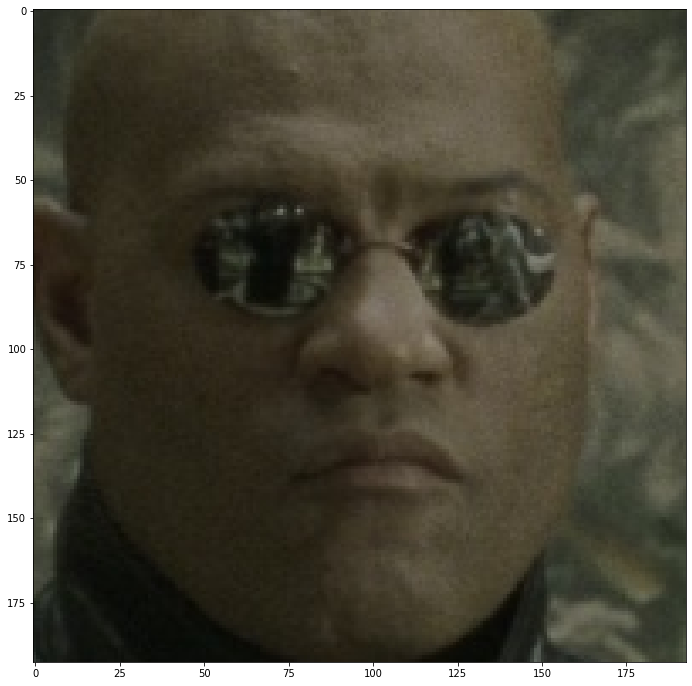

In [16]:
# Show detection
plot_image(face_dict['face'])

### Define Haar Cascade face detection function

In [18]:
def detect_faces_with_haar_cascade(image, scale_factor = 1.2, min_neighbors = 5):
    '''Detect face in an image'''
    
    faces_list = []

    # Convert the test image to gray scale (opencv face detector expects gray images)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load OpenCV face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Detect multiscale images (some images may be closer to camera than others)
    detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    # result is a list of faces
    
    # Calculate number of detections
    num_detected_faces = len(detected_faces)
    
    # If not face detected, return empty list  
    if  num_detected_faces == 0:
        return faces_list
    
    for index in range(0, num_detected_faces):
        # Rearrange detection coords
        start_x,start_y,width,height = detected_faces[index]
        end_x = start_x + width
        end_y = start_y + height
        # Initialize a dictionary that will contain detection details
        face_dict = {}
        # Add detection coords to dictionary
        face_dict['rect'] = (start_x, start_y, end_x, end_y)
        # Crop detection region from image and add it to dictionary
        face_dict['face'] = image[start_y : end_y, start_x : end_x]
        # Since there is no detection probablity, assign it empty
        face_dict['prob'] = []
        # Populate detection list
        faces_list.append(face_dict)
        
    # Return the face image area and the face rectangle
    return faces_list

### Perform and visualize detection

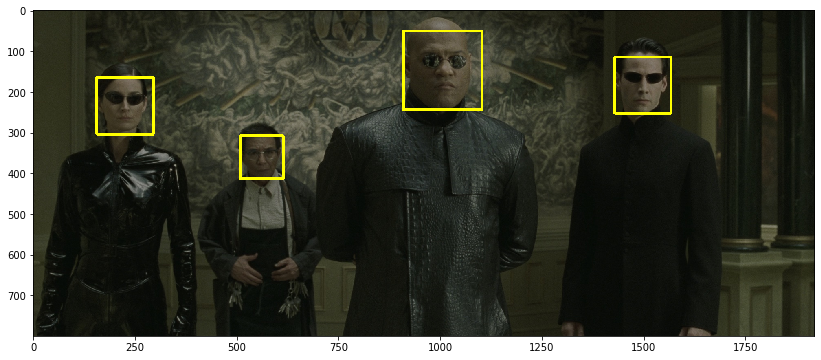

In [20]:
# Read image
image = cv2.imread(images_dir + "sample1.jpg")

# Assign detector parameters
scale_factor = 1.7
min_neighbors = 5

# Detect faces
faces = detect_faces_with_haar_cascade(image, scale_factor, min_neighbors)

# Draw rectangle over detections, if any face is detected
num_faces , image = draw_rectangles(image, faces)

# Show detections
plot_image(image)

In [23]:
# Save result
cv2.imwrite("images/matrix7_detected.jpg", image)

True

# Face Detection with Deep Learning (Single Shot Multibox Detector)

### Define images directory

In [24]:
# Get images directory
images_dir = get_folder_dir("images") 

# Print images directory
print("Images directory: " + images_dir)

Images directory: C:\Users\nsehb\Documents\face-detection-pack\face-detection-app-tutorial/images/


### Read and visualize sample image

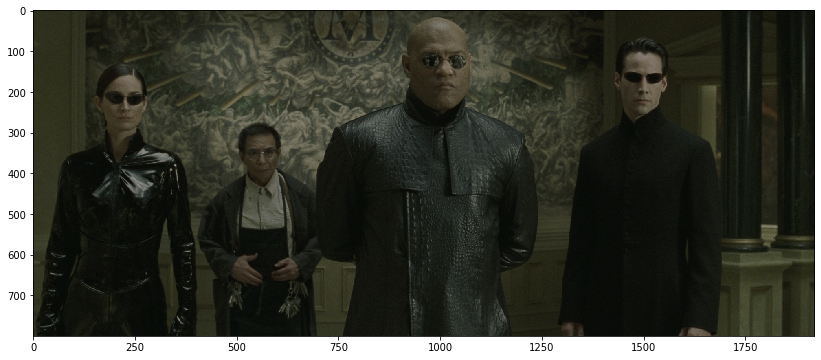

In [25]:
# Read image
image = cv2.imread(images_dir + "sample1.jpg")

# Show image
plot_image(image)

### Load SSD detection model

In [26]:
# Get models directory
models_dir = get_folder_dir("models")

# Assign prototxt and model filenames
prototxt_filename = "deploy.prototxt.txt"
model_filename = "res10_300x300_ssd_iter_140000.caffemodel"

# Load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(models_dir + prototxt_filename, 
                               models_dir + model_filename)

### Preprocess input image and perform detection

In [27]:
# Get image shape
(image_height, image_width) = image.shape[:2]

# Construct an input blob for the image 
# by resizing to a fixed 300x300 pixels and then normalizing it
resized_image = cv2.resize(image, (300, 300))
blob = cv2.dnn.blobFromImage(resized_image,
                             scalefactor = 1.0, 
                             size = (300, 300), 
                             mean = (104.0, 177.0, 123.0))

# Pass the blob through the network and obtain the detections and
# predictions
net.setInput(blob)
detected_faces = net.forward()

# Assign min detection confidence
min_confidence = 0.2

# Calculate number of detections having higher confidence than threshold
num_detected_faces = sum(detected_faces[0, 0, :, 2] > min_confidence)

# Print number of detected faces
print("I see " + str(num_detected_faces) + " faces..")

I see 4 faces..


### Observe detection confidences

In [37]:
# Get face detection details with index 0 (first face)
face_index = 3

# Get detection confidence
confidence = detected_faces[0, 0, face_index, 2]

# Show detection confidence
print("I'm " + str(round(confidence*100,2)) + "% confident.")
# print("str(confidence): " + str(confidence))
# print("str(round(confidence,1)): " + str(round(confidence,1)))
# print("str(round(confidence,3)): " + str(round(confidence,3)))
# print("str(round(confidence*100,2)): " + str(round(confidence*100,2)))


I'm 30.86% confident.


### Process detection result

In [38]:
# Initialize a dictionary that will contain detection details
face_dict = {}

# Get detection coords
rect = detected_faces[0, 0, face_index, 3:7] * np.array([image_width, image_height, image_width, image_height])

# Reformat detection coords
(start_x, start_y, end_x, end_y) = rect.astype("int")

# Convert them to native python variables (int)
start_x = start_x.item()
start_y = start_y.item()
end_x = end_x.item()
end_y = end_y.item()

# Ensure coords are btw [0, image size]
start_x = max(0,start_x)
start_y = max(0,start_y)
end_x = min(end_x,image_width)
end_y = min(end_y,image_height)

# Add detection coords to dictionary
face_dict['rect'] = (start_x, start_y, end_x, end_y)

# Add detection confidence (probability) to dictionary
face_dict['prob'] = confidence * 100

# Crop detection region from image and add it to dictionary
face_dict['face'] = image[start_y : end_y, start_x : end_x]

### Show detected region

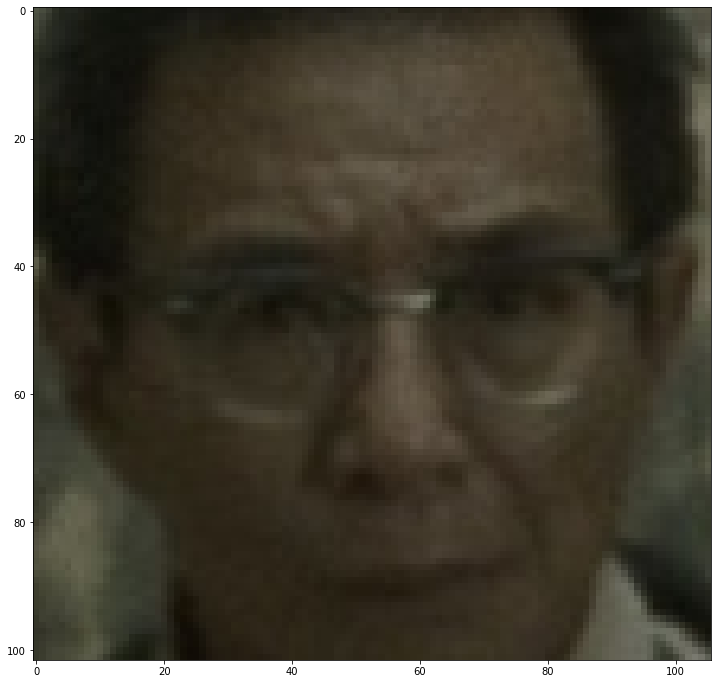

In [39]:
# Show detection
plot_image(face_dict['face'])

### Define deep learning based (SSD) face detection function

In [49]:
def detect_faces_with_ssd(image, min_confidence = 0.2):
    '''Detect face in an image'''
    
    faces_list = []
    
    # Get models directory
    models_dir = get_folder_dir("models")
    # Assign prototxt and model filenames
    prototxt_filename = "deploy.prototxt.txt"
    model_filename = "res10_300x300_ssd_iter_140000.caffemodel"
    
    # Load our serialized model from disk
    net = cv2.dnn.readNetFromCaffe(models_dir + prototxt_filename, 
                               models_dir + model_filename)
    
    # Get image shape
    (image_height, image_width) = image.shape[:2]
    
    # Construct an input blob for the image 
    # by resizing to a fixed 300x300 pixels and then normalizing it
    resized_image = cv2.resize(image, (300, 300))
    blob = cv2.dnn.blobFromImage(resized_image,
                             scalefactor = 1.0, 
                             size = (300, 300), 
                             mean = (104.0, 177.0, 123.0))

    # Pass the blob through the network and obtain the detections and
    # predictions
    net.setInput(blob)
    detected_faces = net.forward()

    
    # Calculate number of detections
    num_detected_faces = detected_faces.shape[2]
    
    # Loop over the detections
    for index in range(0, num_detected_faces):
        # Initialize a dictionary that will contain detection details
        face_dict = {}
        
        # Extract the confidence (i.e., probability) associated with the
        # prediction 
        confidence = detected_faces[0, 0, index, 2]
        # Convert it to a native python variable (float)
        confidence = confidence.item()
        
        # Filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > min_confidence:
            # Get detection coords
            rect = detected_faces[0, 0,index, 3:7] * np.array([image_width, image_height, image_width, image_height])

            # Reformat detection coords
            (start_x, start_y, end_x, end_y) = rect.astype("int")
            # Convert them to native python variables (int)
            start_x = start_x.item()
            start_y = start_y.item()
            end_x = end_x.item()
            end_y = end_y.item()
            
            # Ensure coords are btw [0, image size]
            start_x = max(0,start_x)
            start_y = max(0,start_y)
            end_x = min(end_x,image_width)
            end_y = min(end_y,image_height)
            
            # Add detection coords to dictionary
            face_dict['rect'] = (start_x, start_y, end_x, end_y)

            # Add detection confidence (probability) to dictionary
            face_dict['prob'] = confidence * 100
            
            faces_list.append(face_dict)
            
    # Return the face image area and the face rectangle
    return faces_list

### Perform and visualize detection

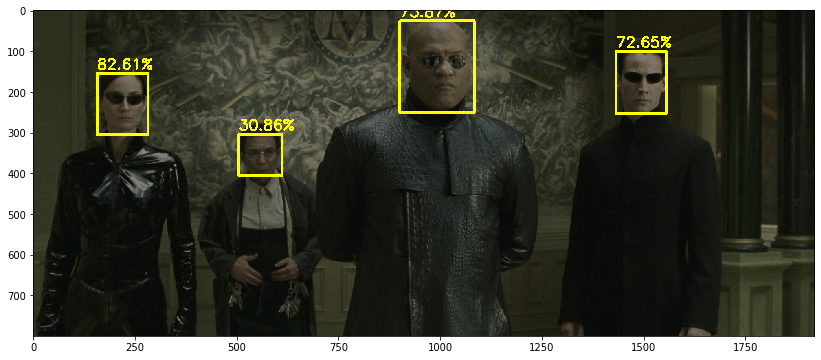

In [51]:
# Read image
image = cv2.imread(images_dir + "sample1.jpg")

# Assign min confidence threshold
min_confidence = 0.3

# Detect faces
faces = detect_faces_with_ssd(image, min_confidence)

# Draw rectangle over detections, if any face is detected
num_faces , image = draw_rectangles(image, faces)

# Show detections
plot_image(image)